# Project: FoodHub Data Analysis

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [27]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [28]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Datasets/FoodHub Data Analysis/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [29]:
# Number of rows
df.shape

(1898, 9)

#### Observations:

The number of rows is: 1898

The number of columns is: 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

* There are three different data types - float64 (represents numerical variables), int64
(represents numerical variables) and object (represents categorical variables)
* There are 5 numerical columns - order_id, customer_id, cost_of_the_order, food_preparation_time
* The rest of the columns are categorical
* The variables **order_id** and **customer_id** might be more meaningful as string variables since they don't represent inherent order or measurement within the data.

In [31]:
# changing order_id and customer_id type to string

df['order_id']        = df['order_id'].astype('str')
df['customer_id']     = df['customer_id'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [32]:
df.isnull().values.any()

False

#### Observations:

The output of the above code (False) implies that **there are no missing values in the data.**

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [33]:
df.describe(include="all")

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1898,1898,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,1898,1200,178,14,NaN,2,4,NaN,NaN
top,1477147,52832,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,1,13,219,584,NaN,1351,736,NaN,NaN
mean,NaN,NaN,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,NaN,NaN,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,NaN,NaN,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,NaN,NaN,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,NaN,NaN,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,NaN,NaN,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:

In regards of the time for the food to be prepared, the minimun is **20 minutes** , the average is **27.37 minutes** and the maximun time is **35 minutes**


### **Question 5:** How many orders are not rated?

In [34]:
# Count the numbers of orders = Not given
df['rating'].value_counts()['Not given']

736

#### Observations:

The number of orders not rated is: **736**

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

array([[<Axes: title={'center': 'cost_of_the_order'}>,
        <Axes: title={'center': 'food_preparation_time'}>],
       [<Axes: title={'center': 'delivery_time'}>, <Axes: >]],
      dtype=object)

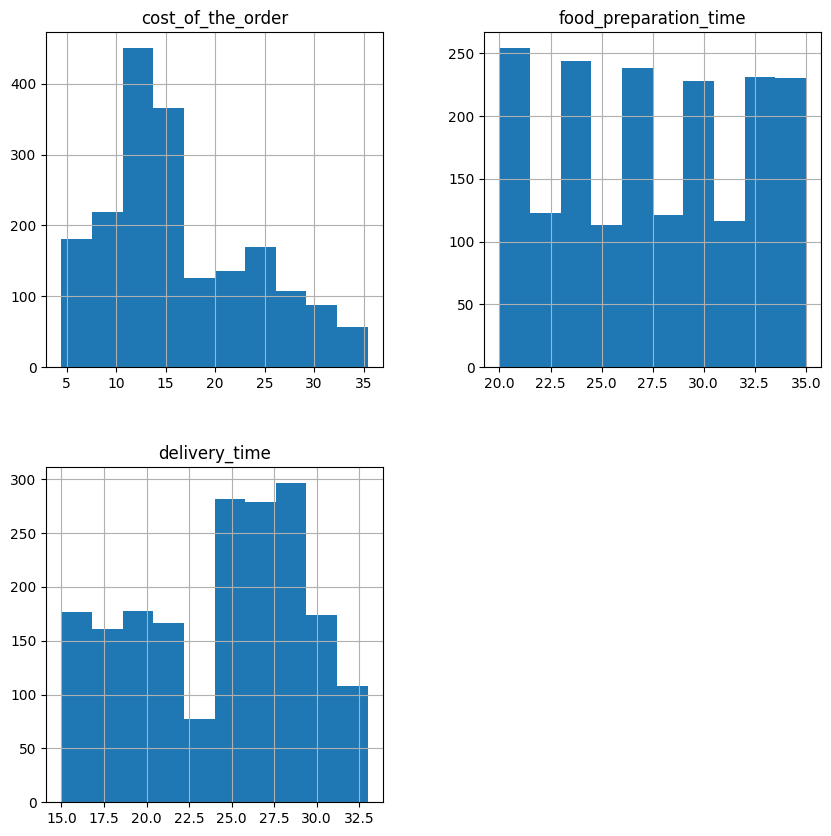

In [35]:
# Histogram
df.hist(figsize=(10,10))

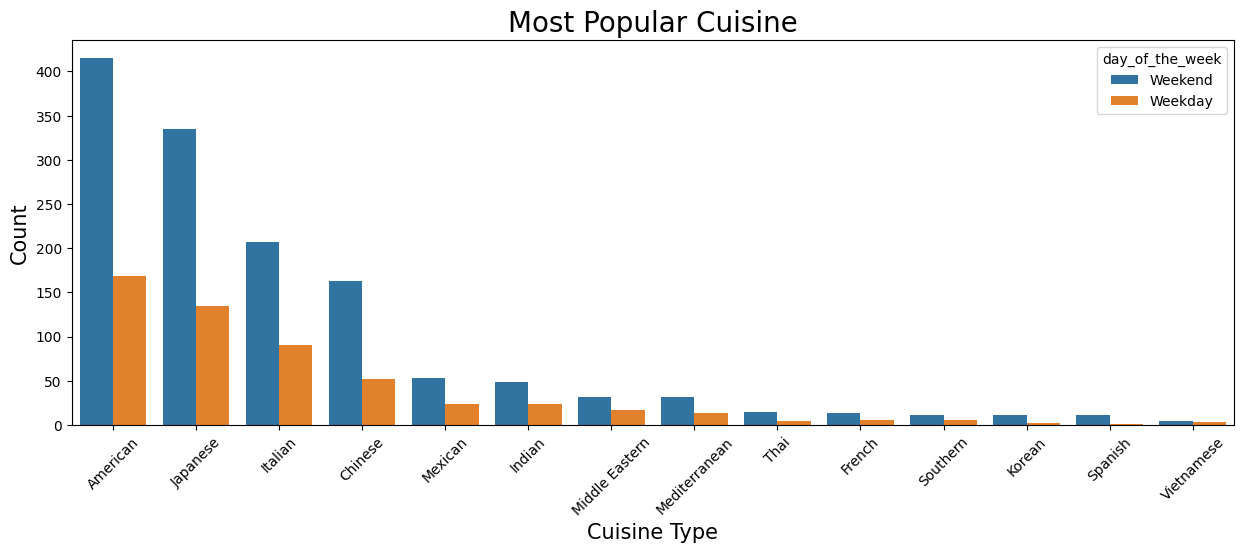

In [36]:
# Bar chart with frequency of cuisine
df['cuisine_type'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='cuisine_type', hue='day_of_the_week',order = df["cuisine_type"].value_counts().index, data=df)
plt.xticks(rotation=45)  # Adjust angle of legend
plt.tick_params(labelsize=10) # Adjust font size
plt.title('Most Popular Cuisine', fontsize=20)
plt.xlabel('Cuisine Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

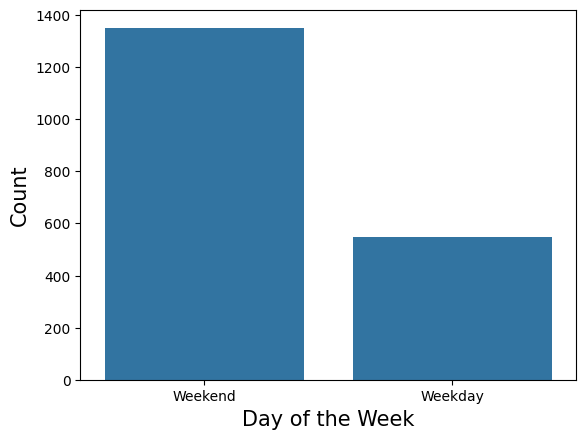

In [37]:
# Bar chart with frequency of day_of_the_week
df['day_of_the_week'].value_counts()
plt.figure()
sns.countplot(x='day_of_the_week', data=df)
plt.xlabel('Day of the Week', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

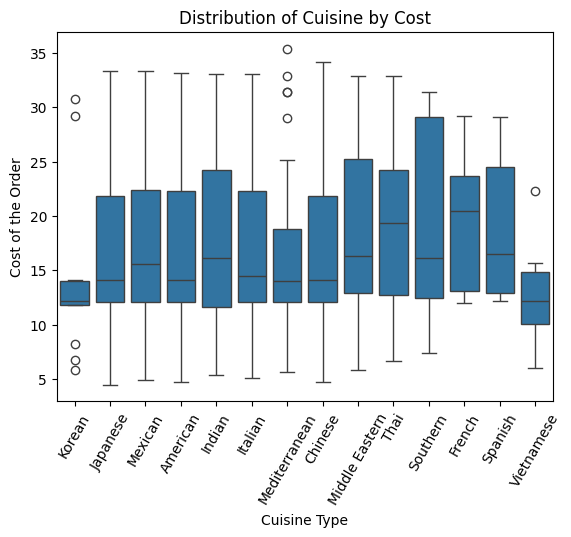

In [38]:
# Boxplot of cuisine type and cost
sns.boxplot(x='cuisine_type',y='cost_of_the_order', data=df)
plt.title("Distribution of Cuisine by Cost")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the Order")
plt.xticks(rotation=60)  #Rotate x-axis labels for readability
plt.show()

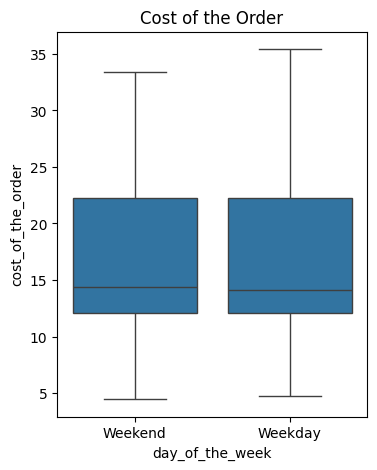

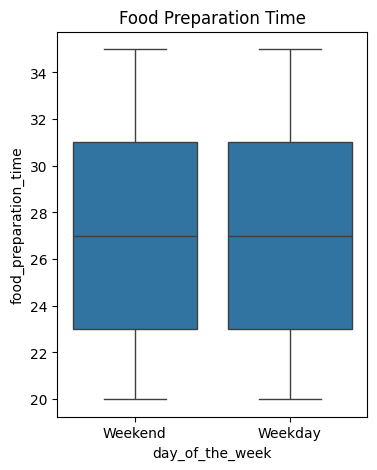

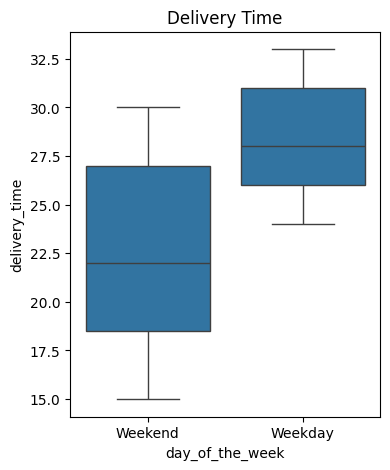

In [39]:
# Boxplot of all numerical variables by day of the week

# Cost of the order
plt.figure(figsize=(4, 5))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title("Cost of the Order")
plt.show()

# Food preparation time
plt.figure(figsize=(4, 5))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title("Food Preparation Time")
plt.show()

# Delivery time
plt.figure(figsize=(4, 5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title("Delivery Time")
plt.show()

### Observations:

We can see that during the week the delivery times are higher than weekends.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [40]:
#count the frequency of a value on the column 'restaurant_name'
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:

The top 5 restaurants in terms of orders received are:

Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [41]:
#Filter df for weekends

weekend_df = df[df['day_of_the_week'] == 'Weekend']

#Count most popular cuisine

weekend_df['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:

Ther most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [66]:
# percentage of orders that cost more than 20 dollars

(df['cost_of_the_order'] > 20).mean() * 100

29.24130663856691

#### Observations:

The percentage of orders that cost more than 20 dollars is 29.24%


### **Question 10**: What is the mean order delivery time?

In [43]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [44]:
# count the frequency of a value on the column 'customer_id'
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

The 3 most frequent customers are:

52832  -  13

47440  -  10

83287  -   9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

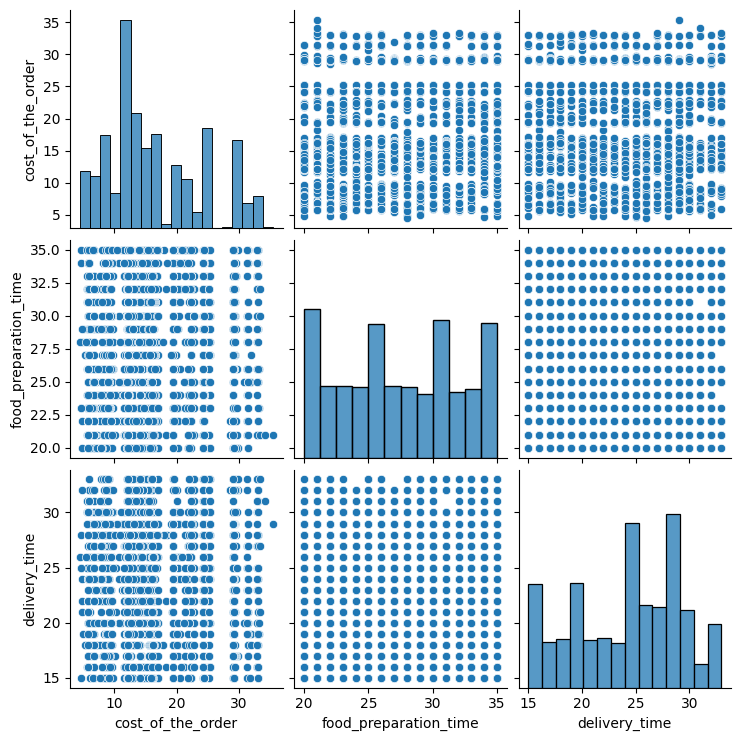

In [45]:
# Plot the pairplots of the variables

sns.pairplot(df)

<Axes: >

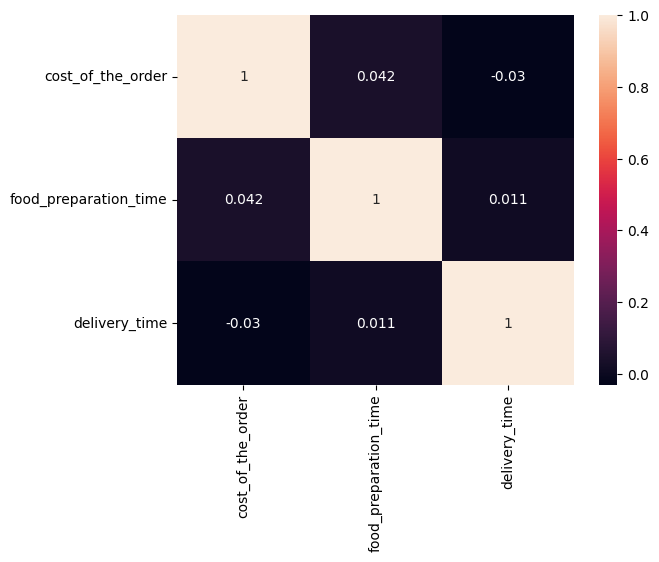

In [46]:
# creating correlationg matrix with numerical columns
corr = df[['cost_of_the_order','food_preparation_time','delivery_time']].corr()
corr

# Visual heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

In [72]:
# pivot table cuisine and ratings
pd.pivot_table(df,
               values=['cost_of_the_order',
               'food_preparation_time',
               'delivery_time',],
               index=['cuisine_type','day_of_the_week'],
               aggfunc=np.mean) \
  .round(2)


cost_of_the_order  delivery_time  \
cuisine_type   day_of_the_week                                     
American       Weekday                      15.31          28.25   
               Weekend                      16.73          22.54   
Chinese        Weekday                      17.15          28.83   
               Weekend                      16.04          22.27   
French         Weekday                      20.87          27.20   
               Weekend                      19.38          24.62   
Indian         Weekday                      17.16          27.62   
               Weekend                      16.80          22.35   
Italian        Weekday                      16.89          28.80   
               Weekend                      16.21          22.71   
Japanese       Weekday                      16.37          28.13   
               Weekend                      16.28          22.52   
Korean         Weekday                      12.18          26.00   
               Weekend                      14.33          20.00   
Mediterranean  Weekday                      14.04          28.79   
               Weekend                      16.10          21.31   
Mexican        Weekday                      16.56          28.25   
               Weekend                      17.10          22.64   
Middle Eastern Weekday                      19.83          28.47   
               Weekend                      18.28          21.75   
Southern       Weekday                      19.23          29.50   
               Weekend                      19.34          20.73   
Spanish        Weekday                      12.13          28.00   
               Weekend                      19.62          23.00   
Thai           Weekday                      15.46          26.50   
               Weekend                      20.21          22.27   
Vietnamese     Weekday                      11.92          27.67   
               Weekend                      13.61          25.00   

                                food_preparation_time  
cuisine_type   day_of_the_week                         
American       Weekday                          27.41  
               Weekend                          27.45  
Chinese        Weekday                          28.08  
               Weekend                          27.33  
French         Weekday                          27.20  
               Weekend                          26.77  
Indian         Weekday                          26.33  
               Weekend                          27.49  
Italian        Weekday                          27.42  
               Weekend                          27.51  
Japanese       Weekday                          27.28  
               Weekend                          27.60  
Korean         Weekday                          23.00  
               Weekend                          25.91  
Mediterranean  Weekday                          25.79  
               Weekend                          27.53  
Mexican        Weekday                          25.62  
               Weekend                          27.23  
Middle Eastern Weekday                          27.24  
               Weekend                          26.38  
Southern       Weekday                          26.17  
               Weekend                          28.36  
Spanish        Weekday                          33.00  
               Weekend                          26.36  
Thai           Weekday                          25.25  
               Weekend                          27.87  
Vietnamese     Weekday                          23.67  
               Weekend                          27.25

In [ ]:
 # Bar chart with frequency of cuisine
df['cuisine_type'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='cuisine_type', hue='day_of_the_week',order = df["cuisine_type"].value_counts().index, data=df)
plt.xticks(rotation=45)  # Adjust angle of legend
plt.tick_params(labelsize=10) # Adjust font size
plt.title('Most Popular Cuisine', fontsize=20)
plt.xlabel('Cuisine Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [73]:
# remove orders where rating were not given

rating_df = df.loc[df['rating'] != 'Not given']

# turn ratings into integer values

rating_df.loc[:, 'rating'] = rating_df['rating'].astype('int64')

# Group by restaurant and filter on count and average in the same step
grouped_df = (rating_df.groupby('restaurant_name')['rating']
              .agg(count_of_entries='count', average_rating='mean')
              .query('count_of_entries > 50 and average_rating > 4')
              .sort_values(by='average_rating', ascending=False)
             )

grouped_df

,count_of_entries,average_rating
restaurant_name,,
The Meatball Shop,84,4.511905
Blue Ribbon Fried Chicken,64,4.328125
Shake Shack,133,4.278195
Blue Ribbon Sushi,73,4.219178


#### Observations:

The restaurants are:
* Blue Ribbon Fried Chicken
* Blue Ribbon Sushi
* Shake Shack
* The Meatball Shop




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [65]:
# Creating a lambda function to charge to applicable order costs

df['cost_of_the_order'].apply(lambda a: a*0.25 if a>20 else (a*0.15 if a>5 else None)).sum().round(2)



6166.3

#### Observations:

The net revenue generated by the company across all orders is $6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [67]:
# Calculate total preparation time
df['total_preparation_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate percentage of orders that take more than 60 minutes
(df['total_preparation_time'] > 60).mean() * 100

10.537407797681771

#### Observations:

The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [69]:
# Calculate the mean times
df.groupby('day_of_the_week')['delivery_time'].mean().round(2)


day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations:

During the week the delivery time is 28.34 minutes and weekends 22.47

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

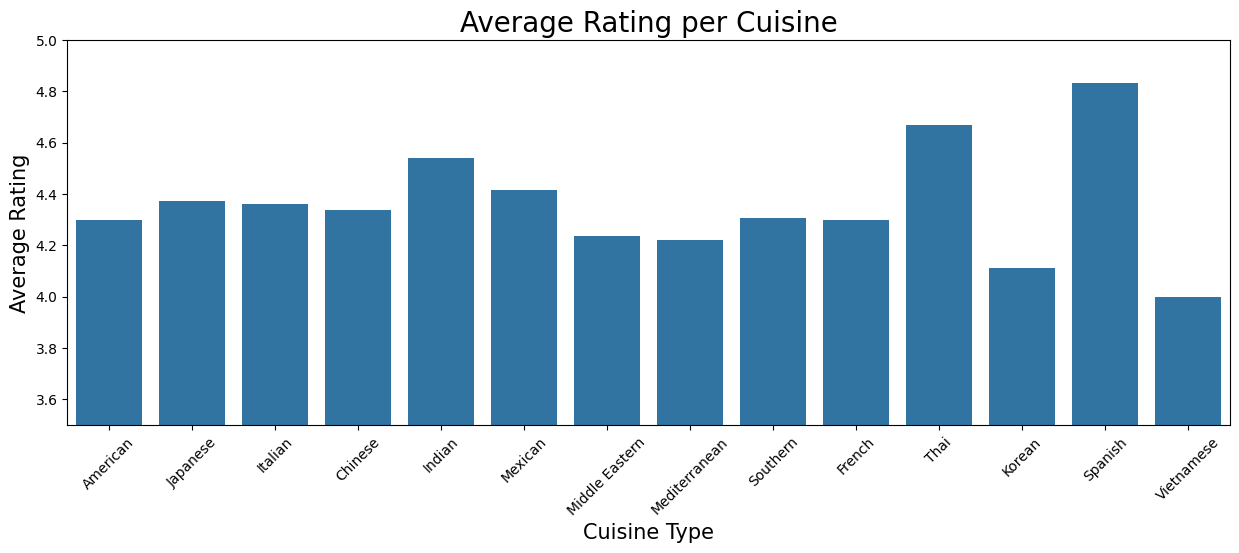

In [88]:
# Calculate average rating per cuisine
average_ratings = rating_df.groupby('cuisine_type')['rating'].mean()

# Create bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=average_ratings.index, y=average_ratings.values,order = rating_df["cuisine_type"].value_counts().index)
plt.ylim(3.5, 5)
plt.xticks(rotation=45)
plt.tick_params(labelsize=10)
plt.title('Average Rating per Cuisine', fontsize=20)
plt.xlabel('Cuisine Type', fontsize=15)
plt.ylabel('Average Rating', fontsize=15)  # Changed label to "Average Rating"
plt.show()

<Axes: >

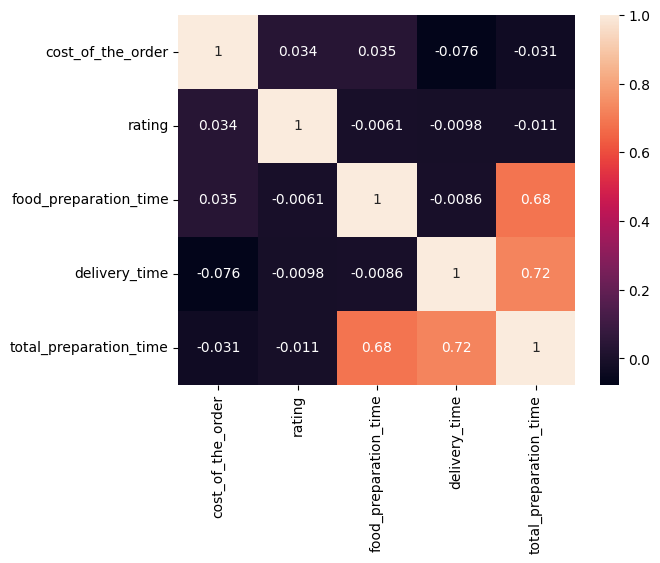

In [96]:
# creating correlationg matrix with numerical columns
corr = rating_df[['cost_of_the_order','rating','food_preparation_time','delivery_time','total_preparation_time']].corr()

# Visual heatmap of the correlation matrix
sns.heatmap(corr, annot=True)

In [90]:
(df['cost_of_the_order'] >= 20).mean() * 100

29.24130663856691

### Conclusions:
*  Most orders take place on the weekend.
* The top 5 restaurants in terms of the number of orders received are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
* The most popular is American.
* The restaurants fulfilling the criteria to get the promotional offer are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.
* The net revenue generated by the company across all orders is: 6166.3 dollars.

### Recommendations:

*  The most in demand cuisine is American followed by Japanese and Itallian. There company can focus it's advertisement on these type of cuisines
* Only 29% of orders cost more than 20 dollars. The company could create promotions to get more orders over the threshold and capitalize on it

---